# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

[2.0020628  3.03832601]
[2.00074128 2.96499888 4.34407195]
[1.99998767 3.00166604 3.94659583 5.4188289 ]


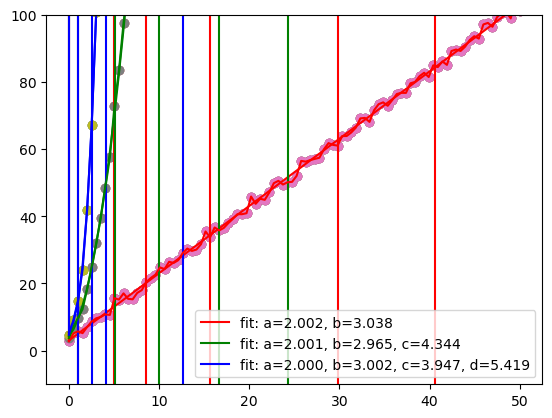

In [127]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# ***Zadanie 1.***

# Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
# * funkcji liniowej,
# * funkcji kwadratowej,
# * wielomianu trzeciego stopnia.

# Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

# Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

# *Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).


xdata = np.linspace(0, 50, 100)
szum = np.random.normal(0, 1, 100)

def func_lin(x, a, b):
    return a*x + b

def func_qua(x, a, b, c):
    return a*x**2 + b*x + c

def multi(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

#aproksymacja funkcją liniową:
y_lin = func_lin(xdata, 2, 3)
ydata_lin = y_lin + szum
popt_lin, pcov_lin = curve_fit(func_lin, xdata, ydata_lin)
plt.plot(xdata, func_lin(xdata, *popt_lin), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt_lin))
plt.scatter(xdata, ydata_lin)

print(popt_lin)

#aproksymacja funkcją kwadratową:
y_qua = func_qua(xdata, 2, 3, 4)
ydata_qua = y_qua + szum
popt_qua, pcov_qua = curve_fit(func_qua, xdata, ydata_qua)
plt.plot(xdata, func_qua(xdata, *popt_qua), 'g-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_qua))
plt.scatter(xdata, ydata_qua)
print(popt_qua)


#aproksymacja wielomianem trzeciego stopnia:
y_multi = multi(xdata, 2, 3, 4, 5)
ydata_multi = y_multi + szum
popt_multi, pcov_multi = curve_fit(multi, xdata, ydata_multi)
plt.plot(xdata, multi(xdata, *popt_multi), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt_multi))
plt.scatter(xdata, ydata_multi)
print(popt_multi)



#interpolacja wielomianem Lagrange'a:
from scipy.interpolate import lagrange
poly = lagrange(xdata, ydata_lin)
plt.plot(xdata, poly(xdata), 'r-')
plt.scatter(xdata, ydata_lin)

poly = lagrange(xdata, ydata_qua)
plt.plot(xdata, poly(xdata), 'g-')
plt.scatter(xdata, ydata_qua)

poly = lagrange(xdata, ydata_multi)
plt.plot(xdata, poly(xdata), 'b-')
plt.scatter(xdata, ydata_multi)


#interpolacja funkcjami sklejanymi:
from scipy.interpolate import CubicSpline
cs = CubicSpline(xdata, ydata_lin)
plt.plot(xdata, cs(xdata), 'r-')
plt.scatter(xdata, ydata_lin)

cs = CubicSpline(xdata, ydata_qua)
plt.plot(xdata, cs(xdata), 'g-')
plt.scatter(xdata, ydata_qua)

cs = CubicSpline(xdata, ydata_multi)
plt.plot(xdata, cs(xdata), 'b-')
plt.scatter(xdata, ydata_multi)

plt.ylim(-10, 100)
plt.legend()
plt.show()

***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [25]:
# Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


# Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

# |czas \[s\]|położenie \[m\]|
# |--|--|
# |0.0|0.0|
# |1.0|42.7|
# |2.0|73.2|
# |3.0|92.5|

time = np.array([0, 1, 2, 3])
position = np.array([0, 42.7, 73.2, 92.5])

#aproksymacja funkcją liniową:
popt_lin, pcov_lin = curve_fit(func_lin, time, position)
print(popt_lin)

#aproksymacja funkcją kwadratową:
popt_qua, pcov_qua = curve_fit(func_qua, time, position)
print(popt_qua)

#aproksymacja wielomianem trzeciego stopnia:
popt_multi, pcov_multi = curve_fit(multi, time, position)
print(popt_multi)

#szacujemy kiedy minął fotoradar:
from scipy.optimize import fsolve
new_position = 79.6
def func(x):
    return func_lin(x, *popt_lin) - new_position

time = fsolve(func, 0)
print(f"Time = {time}")

velocity = new_position / time
print(f"Velocity = {velocity}")


[30.8  5.9]
[-5.85 48.35  0.05]
[ 1.66666667e-01 -6.60000000e+00  4.91333333e+01  4.71791833e-24]
Time = [2.39285714]
Velocity = [33.26567164]


/var/folders/09/x2xp10gs49bbtz1mfs0qwk8w0000gn/T/ipykernel_22336/2781399179.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_multi, pcov_multi = curve_fit(multi, time, position)


***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df.head(10)
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)
print(f"Linear: {model.score(X_test, Y_test)}")


model_tree = DecisionTreeClassifier(random_state=1, splitter='random', max_depth=7)
model_tree.fit(X_train, Y_train)
print(f"Tree: {model_tree.score(X_test, Y_test)}")

model_boost = GradientBoostingClassifier(n_estimators=10, min_samples_leaf=5, min_samples_split=3, max_depth=3, random_state=1)
model_boost.fit(X_train, Y_train)
print(f"Boost: {model_boost.score(X_test, Y_test)}")


Linear: 0.9081529993900115
Tree: 0.9777777777777777
Boost: 0.9777777777777777


In [83]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [118]:
# X.shape, y.shape

# concatendate the data
df = pd.concat([X, y], axis=1)
df.dropna(inplace=True)

In [120]:
df.shape

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [129]:
X['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
# one hot encoding 'workclass' column
# X = pd.get_dummies(X, columns=['workclass'])
# X = X.drop(columns=['workclass_?', 'fnlwgt'])

X = pd.get_dummies(X, columns=['education', 'marital-status', 'occupation', 'relationship', '


,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0,0,0,0,1,0
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,1,0,0
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,1,0,0,0,0
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,1,0,0,0,0
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0,0,0,1,0,0,0,0
48837,39,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0,0,0,1,0,0,0,0
48839,38,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0,0,0,1,0,0,0,0
48840,44,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0,0,0,1,0,0,0,0
